In [ ]:
!pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 23.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.3 MB/s eta 0:00:00


In [ ]:
!pip install numpy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from math import  sqrt
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import statistics as st
from scipy.stats import mode, skew, kurtosis
import seaborn as sns
import random
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout


import pandas as pd
import joblib
import matplotlib.pyplot as plt
import math

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

from keras.models import Sequential
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.preprocessing import sequence
from keras.layers import Dense, LSTM, RNN, GRU, Dropout, Activation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import skew, kurtosis

from torch import nn
from torch.utils.data import DataLoader, Dataset
from datetime import datetime, timedelta
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

from IPython.display import display
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from math import  sqrt
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import statistics as st
from scipy.stats import mode, skew, kurtosis
import seaborn as sns
import random
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout


import pandas as pd
import joblib
import matplotlib.pyplot as plt
import math

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

from keras.models import Sequential
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.preprocessing import sequence
from keras.layers import Dense, LSTM, RNN, GRU, Dropout, Activation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import skew, kurtosis

from torch import nn
from torch.utils.data import DataLoader, Dataset
from datetime import datetime, timedelta
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings("ignore")

In [ ]:
eth_df = pd.read_csv("/content/Ethereum Historical Data (1).csv")
eth_df

,Date,Price,Open,High,Low,Vol.,Change %
0,06/01/2024,"3,815.95","3,762.63","3,832.35","3,753.32",143.81K,1.42%
1,05/31/2024,"3,762.66","3,747.89","3,844.96","3,724.57",294.56K,0.40%
2,05/30/2024,"3,747.55","3,767.22","3,824.94","3,703.74",293.81K,-0.58%
3,05/29/2024,"3,769.57","3,845.56","3,886.44","3,745.72",353.25K,-1.98%
4,05/28/2024,"3,845.56","3,894.33","3,929.21","3,775.08",436.24K,-1.25%
...,...,...,...,...,...,...,...
1915,03/05/2019,136.82,125.97,141.11,125.44,16.74M,8.61%
1916,03/04/2019,125.97,131.02,131.57,123.25,14.11M,-3.85%
1917,03/03/2019,131.01,132.77,168.42,129.05,10.64M,-1.32%
1918,03/02/2019,132.76,135.72,136.36,130.74,11.29M,-2.18%


###Data processing

In [ ]:
eth_df['Date'] = pd.to_datetime(eth_df['Date'])
eth_df.reset_index(drop=True)
eth_df.set_index('Date', inplace=True)
eth_df.sort_index(ascending=True, inplace=True)

In [ ]:
# Hàm để chuyển đổi giá trị có 'K', 'M', hoặc 'B' thành số thực.
def convert_volume(value):
    if 'K' in value:
        return float(value.replace('K', '')) * 1e3
    elif 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'B' in value:
        return float(value.replace('B', '')) * 1e9
    else:
        return float(value)

# Áp dụng hàm cho mỗi giá trị trong cột 'Vol.'.
eth_df['Vol.'] = eth_df['Vol.'].apply(convert_volume)

In [ ]:
# Hàm để chuyển đổi giá trị có dấu % thành số thực.
def convert_percent_to_float(value):
    return float(value.replace('%', '')) / 100

# Giả sử etr_df là DataFrame của bạn với cột 'Percentage' cần được chuyển đổi.
# etr_df['Percentage'] = ...

# Áp dụng hàm cho mỗi giá trị trong cột 'Percentage'.
eth_df['Change %'] = eth_df['Change %'].apply(convert_percent_to_float)


In [ ]:
eth_df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-03-01,135.72,135.47,138.06,128.46,9730000.0,0.0018
2019-03-02,132.76,135.72,136.36,130.74,11290000.0,-0.0218
2019-03-03,131.01,132.77,168.42,129.05,10640000.0,-0.0132
2019-03-04,125.97,131.02,131.57,123.25,14110000.0,-0.0385
2019-03-05,136.82,125.97,141.11,125.44,16740000.0,0.0861
...,...,...,...,...,...,...
2024-05-28,"3,845.56","3,894.33","3,929.21","3,775.08",436240.0,-0.0125
2024-05-29,"3,769.57","3,845.56","3,886.44","3,745.72",353250.0,-0.0198
2024-05-30,"3,747.55","3,767.22","3,824.94","3,703.74",293810.0,-0.0058


In [ ]:
eth_df['Price'] = eth_df['Price'].str.replace(',', '').astype(float)
eth_df['Open'] = eth_df['Open'].str.replace(',', '').astype(float)
eth_df['High'] =eth_df['High'].str.replace(',', '').astype(float)
eth_df['Low'] = eth_df['Low'].str.replace(',', '').astype(float)
eth_df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-03-01,135.72,135.47,138.06,128.46,9730000.0,0.0018
2019-03-02,132.76,135.72,136.36,130.74,11290000.0,-0.0218
2019-03-03,131.01,132.77,168.42,129.05,10640000.0,-0.0132
2019-03-04,125.97,131.02,131.57,123.25,14110000.0,-0.0385
2019-03-05,136.82,125.97,141.11,125.44,16740000.0,0.0861
...,...,...,...,...,...,...
2024-05-28,3845.56,3894.33,3929.21,3775.08,436240.0,-0.0125
2024-05-29,3769.57,3845.56,3886.44,3745.72,353250.0,-0.0198
2024-05-30,3747.55,3767.22,3824.94,3703.74,293810.0,-0.0058


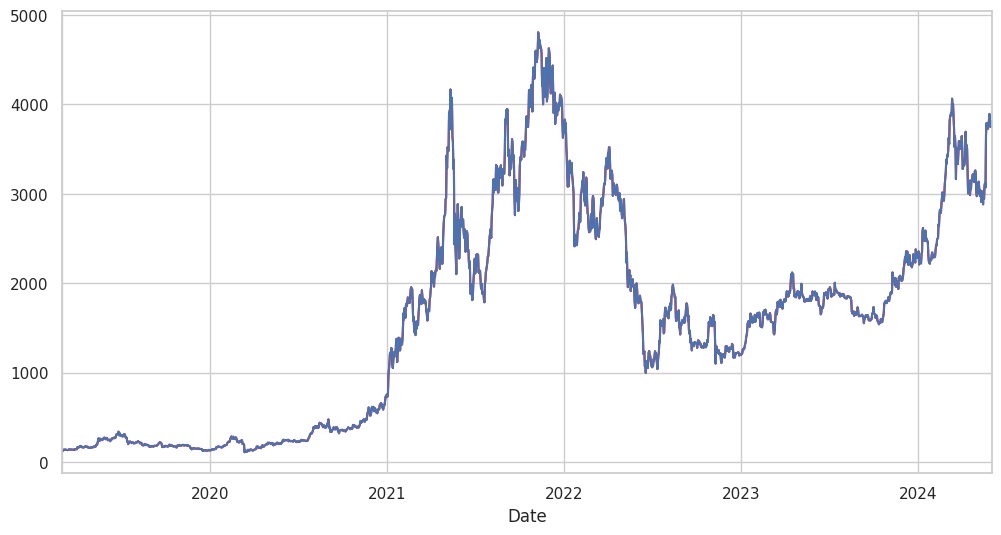

In [ ]:
eth_df['Price'].plot(figsize=(12,6),color='red')

plt.plot(eth_df['Price'])

In [ ]:
eth_df['Price']

Date
2019-03-01     135.72
2019-03-02     132.76
2019-03-03     131.01
2019-03-04     125.97
2019-03-05     136.82
               ...   
2024-05-28    3845.56
2024-05-29    3769.57
2024-05-30    3747.55
2024-05-31    3762.66
2024-06-01    3815.95
Name: Price, Length: 1920, dtype: float64

###Split data 6:4



In [ ]:
window_size = 10
feature_dim = 5

train_size = 0.6
test_size = 0.4

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [ ]:
train_index = int(len(eth_df)*train_size)
train_index

1152

In [ ]:
eth_df_train = eth_df.iloc[:train_index]
eth_df_test  = eth_df[train_index:]

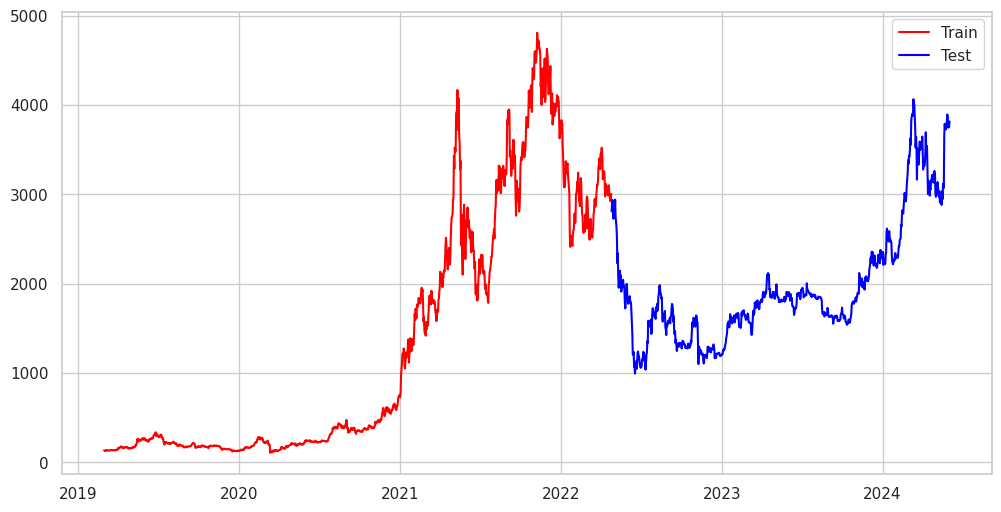

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(eth_df_train).index.to_list(), pd.DataFrame(eth_df_train['Price']), color='red', label='Train')
plt.plot(pd.DataFrame(eth_df_test).index.to_list(),pd.DataFrame(eth_df_test['Price']),color='blue' ,label ='Test')
plt.legend()
plt.show()

In [ ]:
eth_df['Price_diff'] = eth_df['Price'].diff(periods=7)
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1920 entries, 2019-03-01 to 2024-06-01
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       1920 non-null   float64
 1   Open        1920 non-null   float64
 2   High        1920 non-null   float64
 3   Low         1920 non-null   float64
 4   Vol.        1920 non-null   float64
 5   Change %    1920 non-null   float64
 6   Price_diff  1913 non-null   float64
dtypes: float64(7)
memory usage: 120.0 KB


In [ ]:
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff
Date,,,,,,,
2019-03-01,135.72,135.47,138.06,128.46,9730000.0,0.0018,NaN
2019-03-02,132.76,135.72,136.36,130.74,11290000.0,-0.0218,NaN
2019-03-03,131.01,132.77,168.42,129.05,10640000.0,-0.0132,NaN
2019-03-04,125.97,131.02,131.57,123.25,14110000.0,-0.0385,NaN
2019-03-05,136.82,125.97,141.11,125.44,16740000.0,0.0861,NaN
...,...,...,...,...,...,...,...
2024-05-28,3845.56,3894.33,3929.21,3775.08,436240.0,-0.0125,55.10
2024-05-29,3769.57,3845.56,3886.44,3745.72,353250.0,-0.0198,30.49
2024-05-30,3747.55,3767.22,3824.94,3703.74,293810.0,-0.0058,-38.10


In [ ]:
eth_df['Price_diff'].fillna(method='backfill', inplace=True)

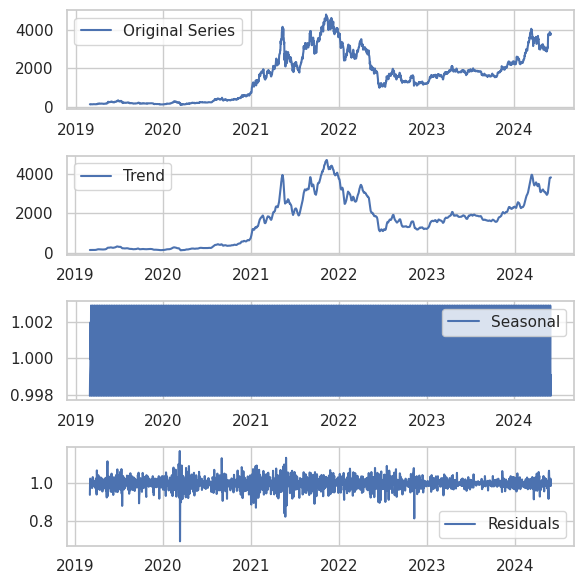

In [ ]:
result = seasonal_decompose(eth_df['Price'], model='multiplicative', period=7)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(6,6))

plt.subplot(4, 1, 1)
plt.plot(eth_df['Price'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()
# for fun i guess

In [ ]:
eth_df['month_index'] = eth_df.index.month
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,135.72,135.47,138.06,128.46,9730000.0,0.0018,-1.87,3
2019-03-02,132.76,135.72,136.36,130.74,11290000.0,-0.0218,-1.87,3
2019-03-03,131.01,132.77,168.42,129.05,10640000.0,-0.0132,-1.87,3
2019-03-04,125.97,131.02,131.57,123.25,14110000.0,-0.0385,-1.87,3
2019-03-05,136.82,125.97,141.11,125.44,16740000.0,0.0861,-1.87,3
...,...,...,...,...,...,...,...,...
2024-05-28,3845.56,3894.33,3929.21,3775.08,436240.0,-0.0125,55.10,5
2024-05-29,3769.57,3845.56,3886.44,3745.72,353250.0,-0.0198,30.49,5
2024-05-30,3747.55,3767.22,3824.94,3703.74,293810.0,-0.0058,-38.10,5


In [ ]:
df_monthly = eth_df.resample('M').mean()
df_monthly

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-31,136.375161,136.172581,140.065484,133.572258,1.167710e+07,0.001752,0.784516,3.0
2019-04-30,165.005667,164.344333,169.412667,159.621333,1.186200e+07,0.005223,4.618000,4.0
2019-05-31,219.652581,216.219677,227.308065,209.318387,1.344806e+07,0.017661,23.737419,5.0
2019-06-30,274.209333,273.389000,282.697333,264.795667,8.730000e+06,0.003943,11.260333,6.0
2019-07-31,247.334516,249.753226,256.461290,238.759032,9.371613e+06,-0.008245,-22.530323,7.0
...,...,...,...,...,...,...,...,...
2024-02-29,2746.431724,2710.027241,2782.710690,2672.922759,4.425869e+05,0.013400,214.253793,2.0
2024-03-31,3626.963871,3616.920968,3722.042258,3501.579032,5.989626e+05,0.003642,88.199032,3.0
2024-04-30,3246.043333,3267.134667,3340.207000,3150.657667,4.535570e+05,-0.005713,-90.864667,4.0


<Axes: xlabel='Date'>

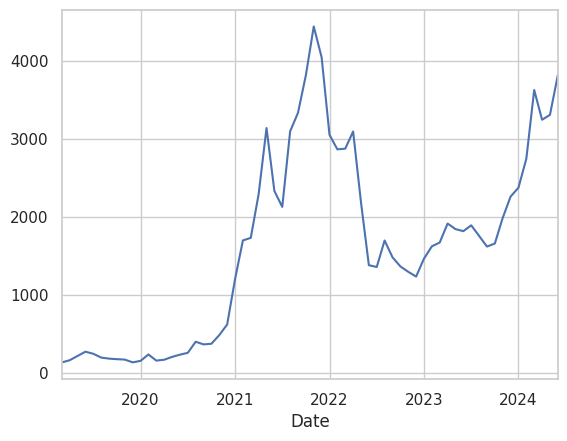

In [ ]:
df_monthly['Price'].plot()

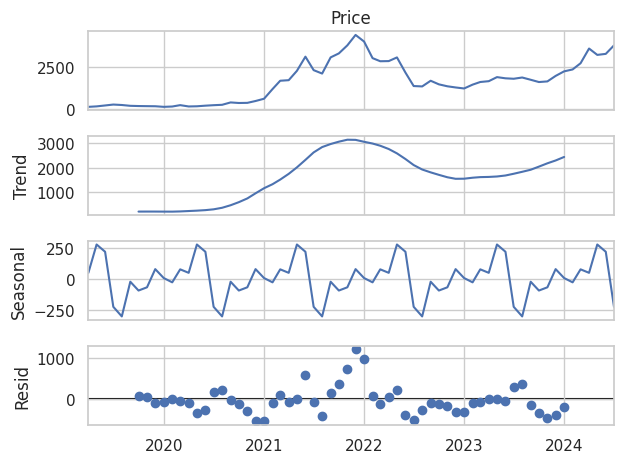

In [ ]:
decompose = seasonal_decompose(df_monthly['Price'])
decompose.plot()

plt.show()

In [ ]:
#import pmdarima as pm
#model = pm.auto_arima(df_monthly['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
					#	d=None, D=1,m=12,
				#		error_action='ignore',
					#	suppress_warnings=True,
				#		stepwise=True)

In [ ]:
import pmdarima as pm
model = pm.auto_arima(eth_df['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
						d=None, D=1,m=7,max_p=3, max_d=2, max_q=3,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,1,1)[7] intercept   : AIC=inf, Time=17.22 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=26055.170, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=23170.498, Time=4.29 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=24791.017, Time=2.54 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=26060.355, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=23667.577, Time=0.28 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=22923.368, Time=13.19 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=12.58 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=6.12 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=26051.399, Time=2.48 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=22919.944, Time=13.98 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=23165.836, Time=4.58 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=18.08 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=7.80 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=22

In [ ]:
train = eth_df_train['Price']
test = eth_df_test['Price']
start = len(train)
end = len(train) +len(test) -1
model_sarimax = sm.tsa.statespace.SARIMAX(eth_df['Price'],
                                          order = (4,0,1),
                                          seasonal_order = (2,1,0,7))
result = model_sarimax.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 1920
Model:             SARIMAX(4, 0, 1)x(2, 1, [], 7)   Log Likelihood              -11441.674
Date:                            Tue, 18 Jun 2024   AIC                          22899.349
Time:                                    09:34:38   BIC                          22943.800
Sample:                                03-01-2019   HQIC                         22915.707
                                     - 06-01-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5955      0.072     22.093      0.000       1.454       1.737
ar.L2         -0.5149      0.068     -7.520      0.000      -0.649      -0.381
ar.L3         -0.0802      0.026     -3.029      0.002      -0.132      -0.028
ar.L4         -0.0234      0.018     -1.321      0.186      -0.058       0.011
ma.L1         -0.7165      0.070    -10.182      0.000      -0.854      -0.579
ar.S.L7       -0.6807      0.011    -60.672      0.000      -0.703      -0.659
ar.S.L14      -0.3485      0.012    -28.198      0.000      -0.373      -0.324
sigma2      9150.3876    136.986     66.798      0.000    8881.900    9418.875
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7167.63
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              28.96   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions = result.predict(start, end)
predictions

2022-04-26    2998.690452
2022-04-27    2791.400185
2022-04-28    2854.198932
2022-04-29    2933.594502
2022-04-30    2870.269917
                 ...     
2024-05-28    3857.199632
2024-05-29    3824.719630
2024-05-30    3734.617236
2024-05-31    3684.418228
2024-06-01    3724.427052
Freq: D, Name: predicted_mean, Length: 768, dtype: float64

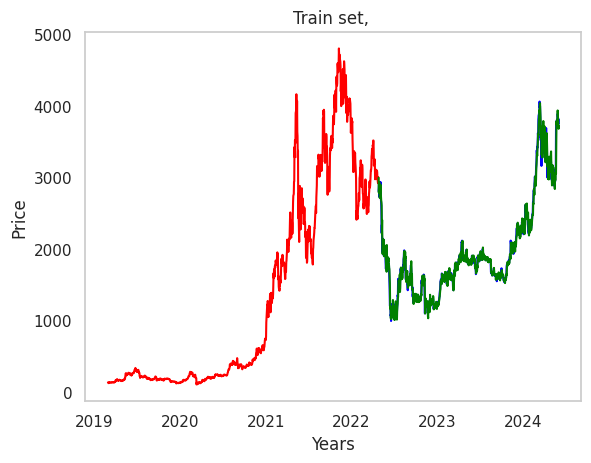

In [ ]:
plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error


print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MAPE =  0.028944646211524178
MAE =  55.3096301123119
RMSE =  81.13731076248285


In [ ]:
start = len(eth_df)

end = (len(eth_df) - 1) + 30

forecast_30 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 60


forecast_60 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 90


forecast_90 = result.predict(start, end)

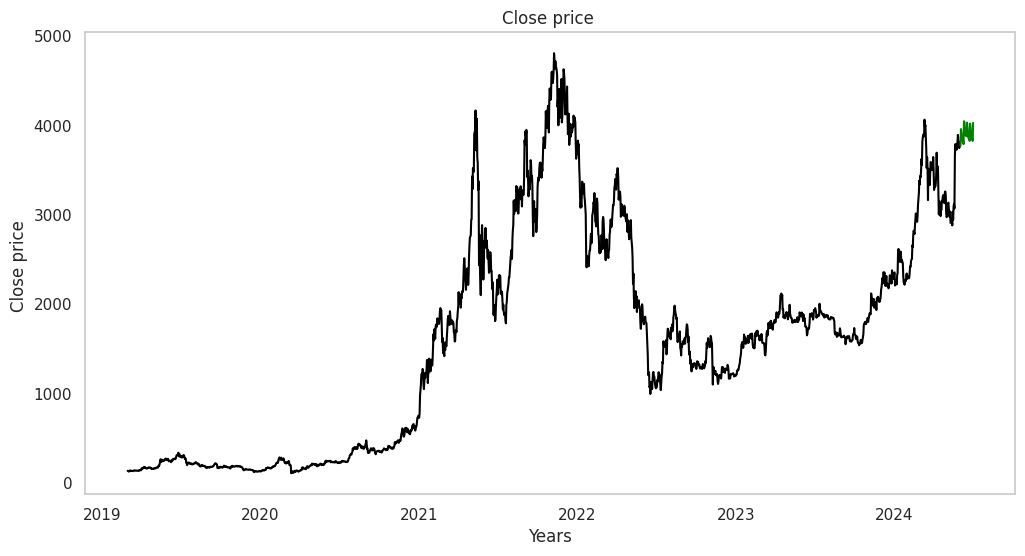

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Price'], color = 'black')
plt.plot(forecast_30, color = 'green')

# title and axis captions
plt.title("Close price ")
plt.ylabel("Close price ")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

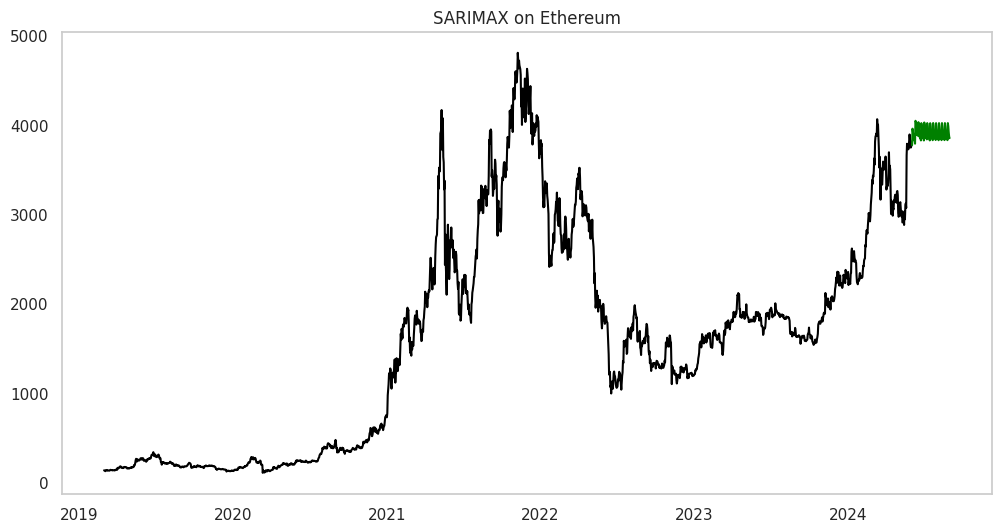

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Price'], color = 'black')
plt.plot(forecast_90, color = 'green')

# title and axis captions
#plt.title("Close price ")
#plt.ylabel("Close price ")
#plt.xlabel('Years')

# add a grid
plt.title("SARIMAX on Ethereum")
plt.grid()

plt.show()

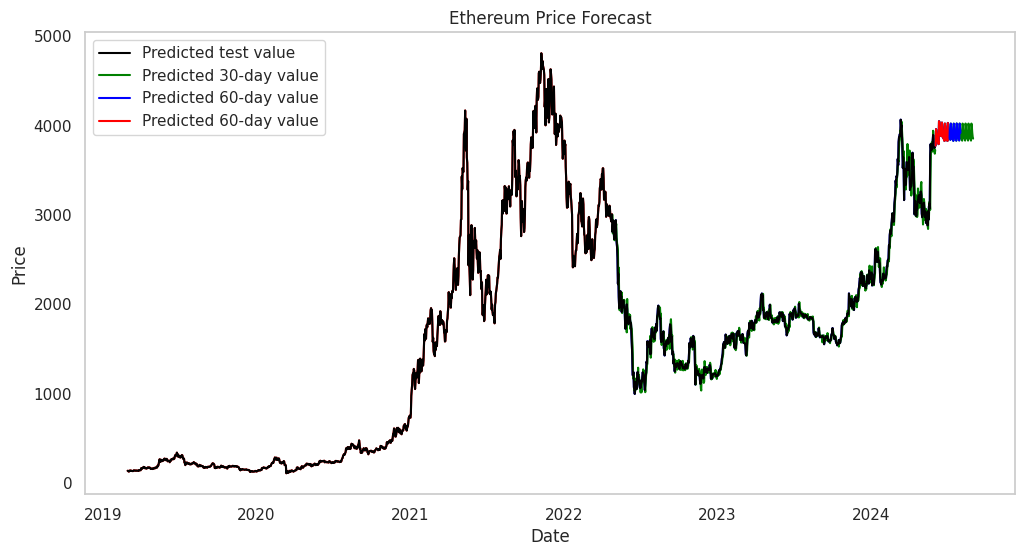

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')


plt.plot(eth_df['Price'], color = 'black', label='Predicted test value')
plt.plot(forecast_90, color = 'green', label='Predicted 30-day value')
plt.plot(forecast_60, color = 'blue', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'red', label='Predicted 60-day value')

# title and axis captions
plt.title("Ethereum Price Forecast")
plt.ylabel("Price")
plt.xlabel('Date')

# add a legend
plt.legend()

# add a grid
plt.grid()

# display the plot
plt.show()


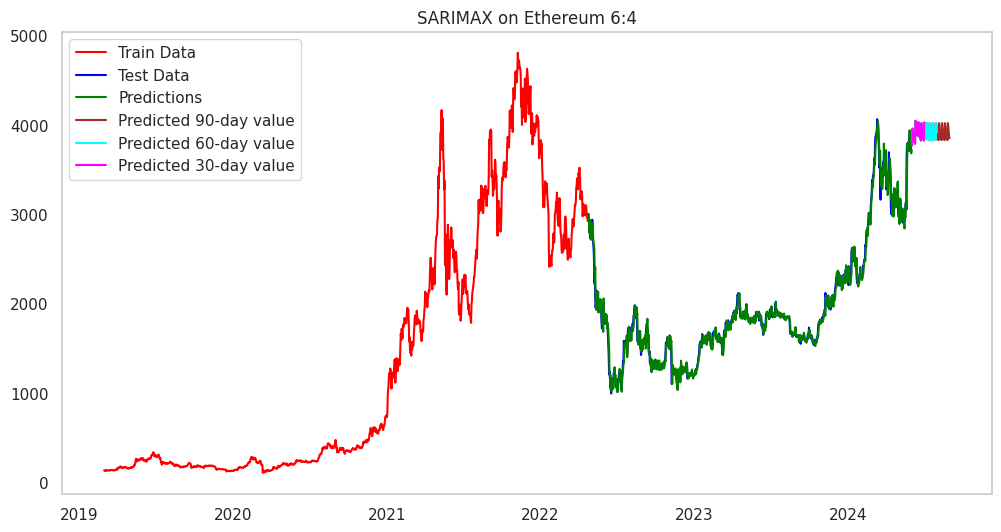

In [ ]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_90, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_60, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("SARIMAX on Ethereum 6:4")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()


###Split data 7:3

In [ ]:
window_size = 10
feature_dim = 5

train_size = 0.7
test_size = 0.3

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [ ]:
train_index = int(len(eth_df)*train_size)
train_index

1344

In [ ]:
eth_df_train = eth_df.iloc[:train_index]
eth_df_test  = eth_df[train_index:]

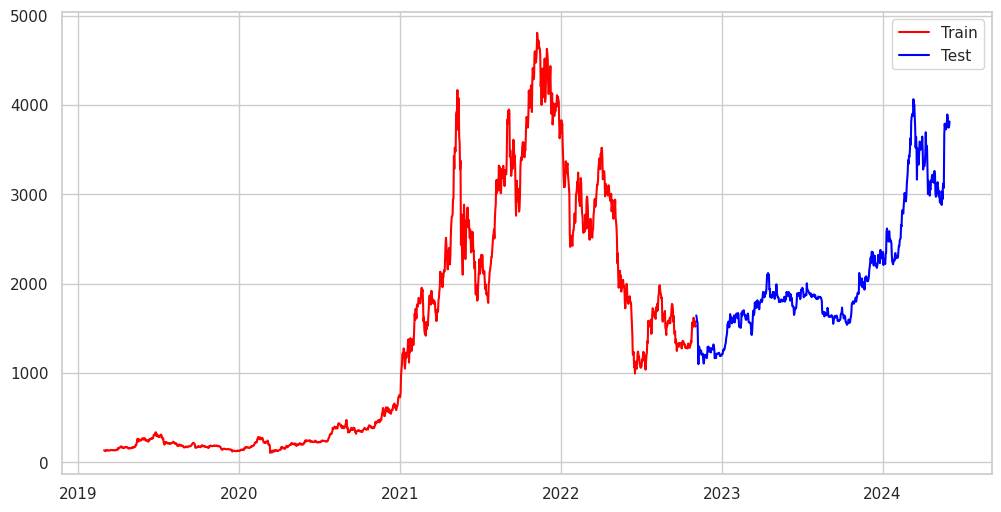

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(eth_df_train).index.to_list(), pd.DataFrame(eth_df_train['Price']), color='red', label='Train')
plt.plot(pd.DataFrame(eth_df_test).index.to_list(),pd.DataFrame(eth_df_test['Price']),color='blue' ,label ='Test')
plt.legend()
plt.show()

In [ ]:
eth_df['Price_diff'] = eth_df['Price'].diff(periods=7)
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1920 entries, 2019-03-01 to 2024-06-01
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        1920 non-null   float64
 1   Open         1920 non-null   float64
 2   High         1920 non-null   float64
 3   Low          1920 non-null   float64
 4   Vol.         1920 non-null   float64
 5   Change %     1920 non-null   float64
 6   Price_diff   1913 non-null   float64
 7   month_index  1920 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 127.5 KB


In [ ]:
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,135.72,135.47,138.06,128.46,9730000.0,0.0018,NaN,3
2019-03-02,132.76,135.72,136.36,130.74,11290000.0,-0.0218,NaN,3
2019-03-03,131.01,132.77,168.42,129.05,10640000.0,-0.0132,NaN,3
2019-03-04,125.97,131.02,131.57,123.25,14110000.0,-0.0385,NaN,3
2019-03-05,136.82,125.97,141.11,125.44,16740000.0,0.0861,NaN,3
...,...,...,...,...,...,...,...,...
2024-05-28,3845.56,3894.33,3929.21,3775.08,436240.0,-0.0125,55.10,5
2024-05-29,3769.57,3845.56,3886.44,3745.72,353250.0,-0.0198,30.49,5
2024-05-30,3747.55,3767.22,3824.94,3703.74,293810.0,-0.0058,-38.10,5


In [ ]:
eth_df['Price_diff'].fillna(method='backfill', inplace=True)

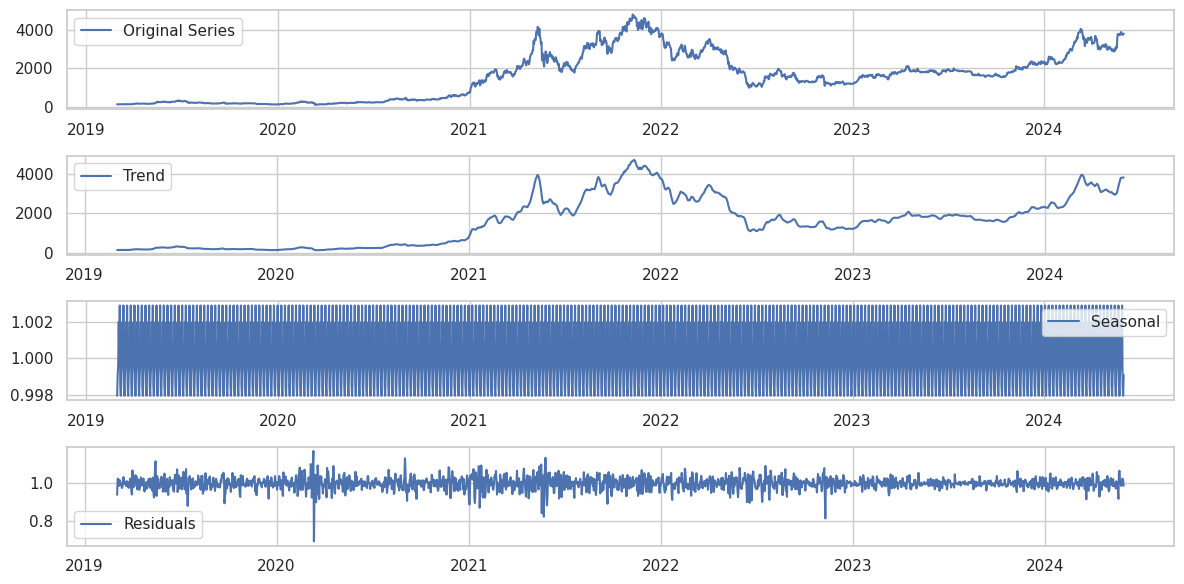

In [ ]:
result = seasonal_decompose(eth_df['Price'], model='multiplicative', period=7)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(12,6))

plt.subplot(4, 1, 1)
plt.plot(eth_df['Price'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()
# for fun i guess

In [ ]:
eth_df['month_index'] = eth_df.index.month
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,135.72,135.47,138.06,128.46,9730000.0,0.0018,-1.87,3
2019-03-02,132.76,135.72,136.36,130.74,11290000.0,-0.0218,-1.87,3
2019-03-03,131.01,132.77,168.42,129.05,10640000.0,-0.0132,-1.87,3
2019-03-04,125.97,131.02,131.57,123.25,14110000.0,-0.0385,-1.87,3
2019-03-05,136.82,125.97,141.11,125.44,16740000.0,0.0861,-1.87,3
...,...,...,...,...,...,...,...,...
2024-05-28,3845.56,3894.33,3929.21,3775.08,436240.0,-0.0125,55.10,5
2024-05-29,3769.57,3845.56,3886.44,3745.72,353250.0,-0.0198,30.49,5
2024-05-30,3747.55,3767.22,3824.94,3703.74,293810.0,-0.0058,-38.10,5


In [ ]:
df_monthly = eth_df.resample('M').mean()
df_monthly

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-31,136.375161,136.172581,140.065484,133.572258,1.167710e+07,0.001752,0.784516,3.0
2019-04-30,165.005667,164.344333,169.412667,159.621333,1.186200e+07,0.005223,4.618000,4.0
2019-05-31,219.652581,216.219677,227.308065,209.318387,1.344806e+07,0.017661,23.737419,5.0
2019-06-30,274.209333,273.389000,282.697333,264.795667,8.730000e+06,0.003943,11.260333,6.0
2019-07-31,247.334516,249.753226,256.461290,238.759032,9.371613e+06,-0.008245,-22.530323,7.0
...,...,...,...,...,...,...,...,...
2024-02-29,2746.431724,2710.027241,2782.710690,2672.922759,4.425869e+05,0.013400,214.253793,2.0
2024-03-31,3626.963871,3616.920968,3722.042258,3501.579032,5.989626e+05,0.003642,88.199032,3.0
2024-04-30,3246.043333,3267.134667,3340.207000,3150.657667,4.535570e+05,-0.005713,-90.864667,4.0


<Axes: xlabel='Date'>

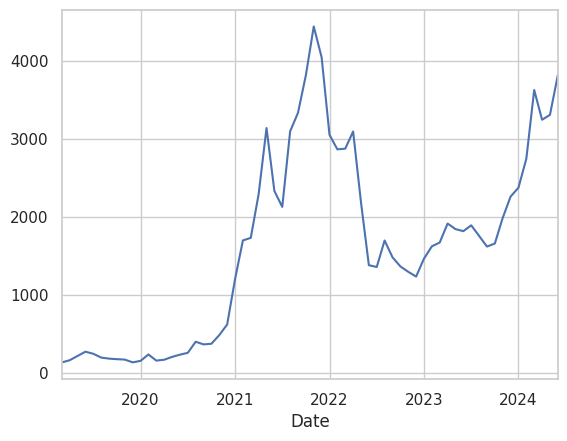

In [ ]:
df_monthly['Price'].plot()

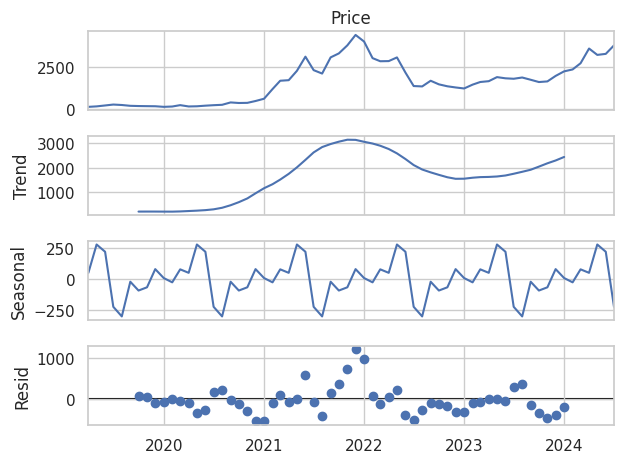

In [ ]:
decompose = seasonal_decompose(df_monthly['Price'])
decompose.plot()

plt.show()

In [ ]:
#import pmdarima as pm
#model = pm.auto_arima(df_monthly['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
					#	d=None, D=1,m=12,
				#		error_action='ignore',
					#	suppress_warnings=True,
				#		stepwise=True)

In [ ]:
import pmdarima as pm
model = pm.auto_arima(eth_df['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
						d=None, D=1,m=7,max_p=3, max_d=2, max_q=3,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,1,1)[7] intercept   : AIC=inf, Time=13.18 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=26055.170, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=23170.498, Time=3.86 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=24791.017, Time=4.05 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=26060.355, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=23667.577, Time=0.18 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=22923.368, Time=9.55 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=11.00 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=5.19 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=26051.399, Time=2.22 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=22919.944, Time=11.49 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=23165.836, Time=4.82 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=16.20 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=5.12 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=229

In [ ]:
train = eth_df_train['Price']
test = eth_df_test['Price']
start = len(train)
end = len(train) +len(test) -1
model_sarimax = sm.tsa.statespace.SARIMAX(eth_df['Price'],
                                          order = (4,0,1),
                                          seasonal_order = (2,1,0,7))
result = model_sarimax.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 1920
Model:             SARIMAX(4, 0, 1)x(2, 1, [], 7)   Log Likelihood              -11441.674
Date:                            Tue, 18 Jun 2024   AIC                          22899.349
Time:                                    09:51:08   BIC                          22943.800
Sample:                                03-01-2019   HQIC                         22915.707
                                     - 06-01-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5955      0.072     22.093      0.000       1.454       1.737
ar.L2         -0.5149      0.068     -7.520      0.000      -0.649      -0.381
ar.L3         -0.0802      0.026     -3.029      0.002      -0.132      -0.028
ar.L4         -0.0234      0.018     -1.321      0.186      -0.058       0.011
ma.L1         -0.7165      0.070    -10.182      0.000      -0.854      -0.579
ar.S.L7       -0.6807      0.011    -60.672      0.000      -0.703      -0.659
ar.S.L14      -0.3485      0.012    -28.198      0.000      -0.373      -0.324
sigma2      9150.3876    136.986     66.798      0.000    8881.900    9418.875
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7167.63
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              28.96   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions = result.predict(start, end)
predictions

2022-11-04    1530.763749
2022-11-05    1632.976549
2022-11-06    1632.600427
2022-11-07    1560.424164
2022-11-08    1583.991669
                 ...     
2024-05-28    3857.199632
2024-05-29    3824.719630
2024-05-30    3734.617236
2024-05-31    3684.418228
2024-06-01    3724.427052
Freq: D, Name: predicted_mean, Length: 576, dtype: float64

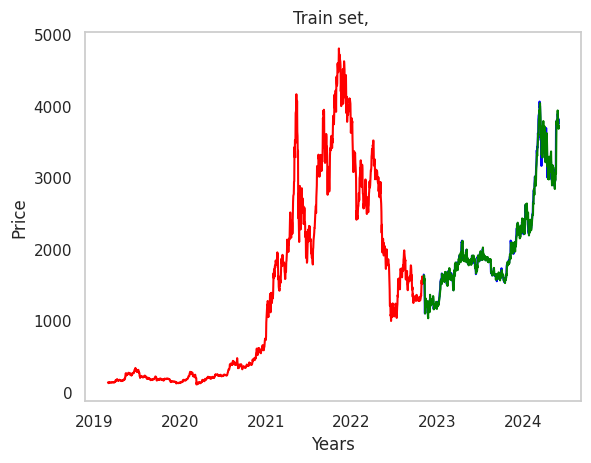

In [ ]:
plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error


print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MAPE =  0.02423887699166073
MAE =  50.91368863166156
RMSE =  76.2002721282125


In [ ]:
start = len(eth_df)

end = (len(eth_df) - 1) + 30

forecast_30 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 60


forecast_60 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 90


forecast_90 = result.predict(start, end)

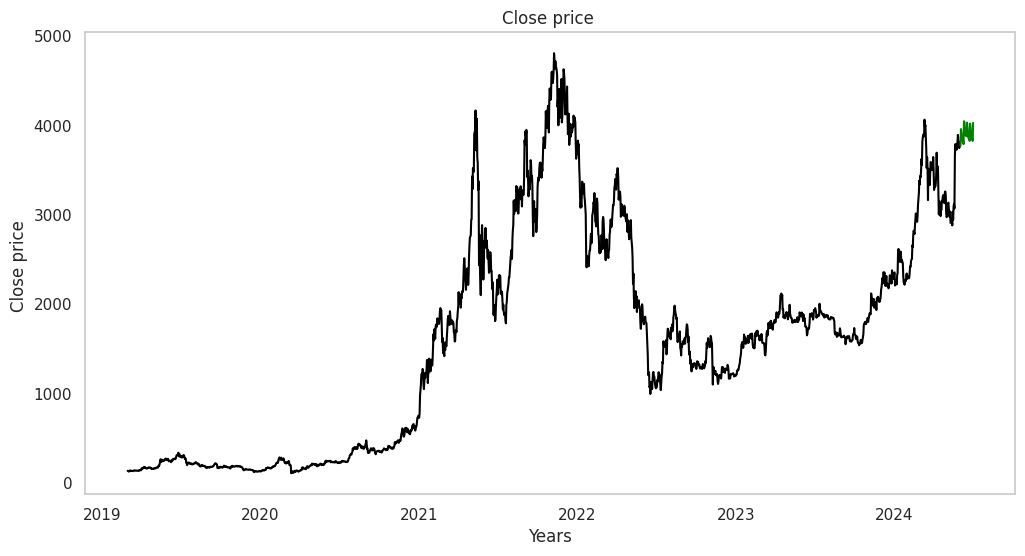

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Price'], color = 'black')
plt.plot(forecast_30, color = 'green')

# title and axis captions
plt.title("Close price ")
plt.ylabel("Close price ")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

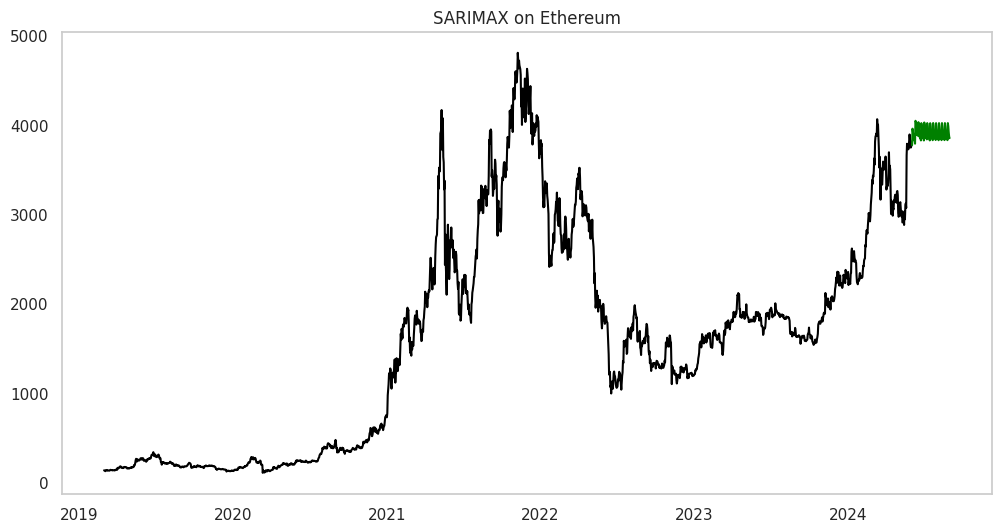

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Price'], color = 'black')
plt.plot(forecast_90, color = 'green')

# title and axis captions
#plt.title("Close price ")
#plt.ylabel("Close price ")
#plt.xlabel('Years')

# add a grid
plt.title("SARIMAX on Ethereum")
plt.grid()

plt.show()

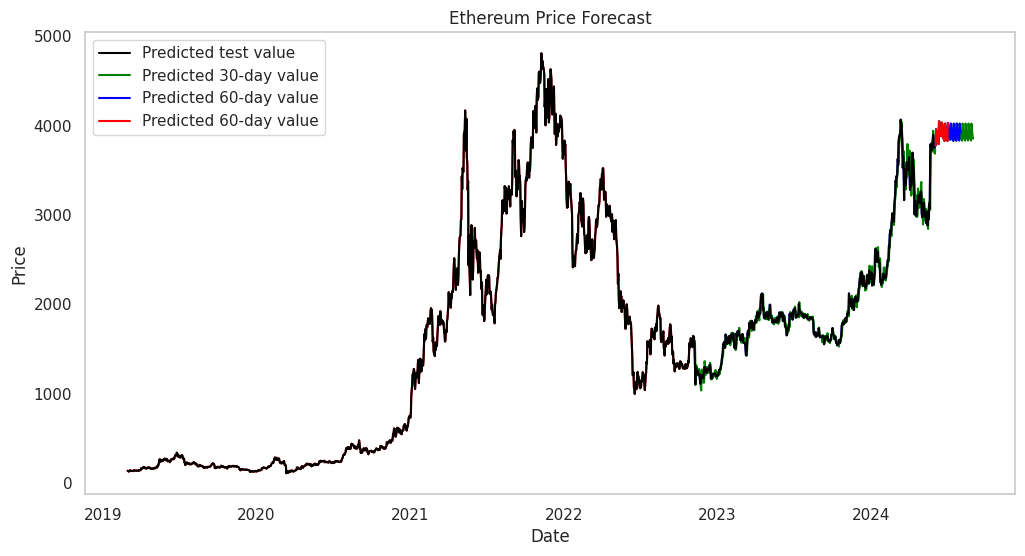

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')


plt.plot(eth_df['Price'], color = 'black', label='Predicted test value')
plt.plot(forecast_90, color = 'green', label='Predicted 30-day value')
plt.plot(forecast_60, color = 'blue', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'red', label='Predicted 60-day value')

# title and axis captions
plt.title("Ethereum Price Forecast")
plt.ylabel("Price")
plt.xlabel('Date')

# add a legend
plt.legend()

# add a grid
plt.grid()

# display the plot
plt.show()


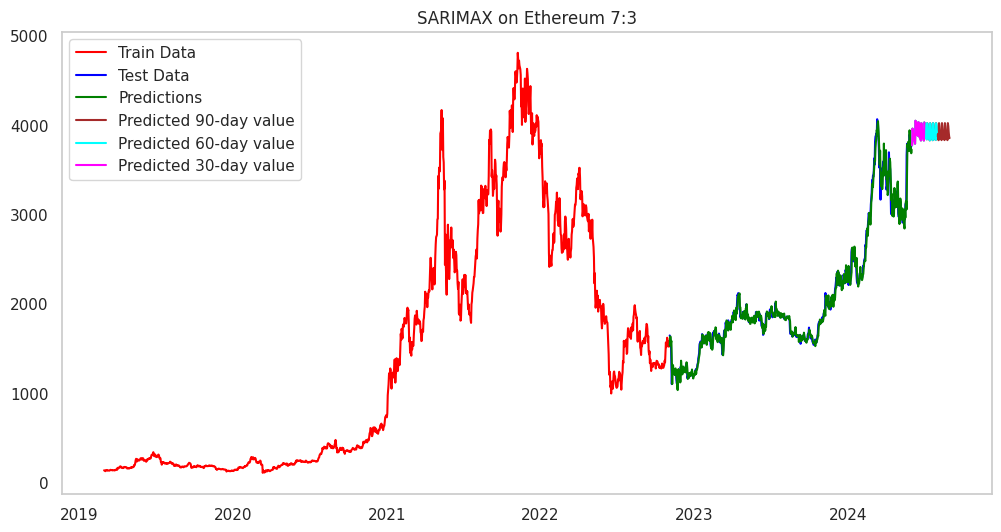

In [ ]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_90, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_60, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("SARIMAX on Ethereum 7:3")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()


###Split data 8:2



In [ ]:
window_size = 10
feature_dim = 5

train_size = 0.8
test_size = 0.2

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [ ]:
train_index = int(len(eth_df)*train_size)
train_index

1536

In [ ]:
eth_df_train = eth_df.iloc[:train_index]
eth_df_test  = eth_df[train_index:]

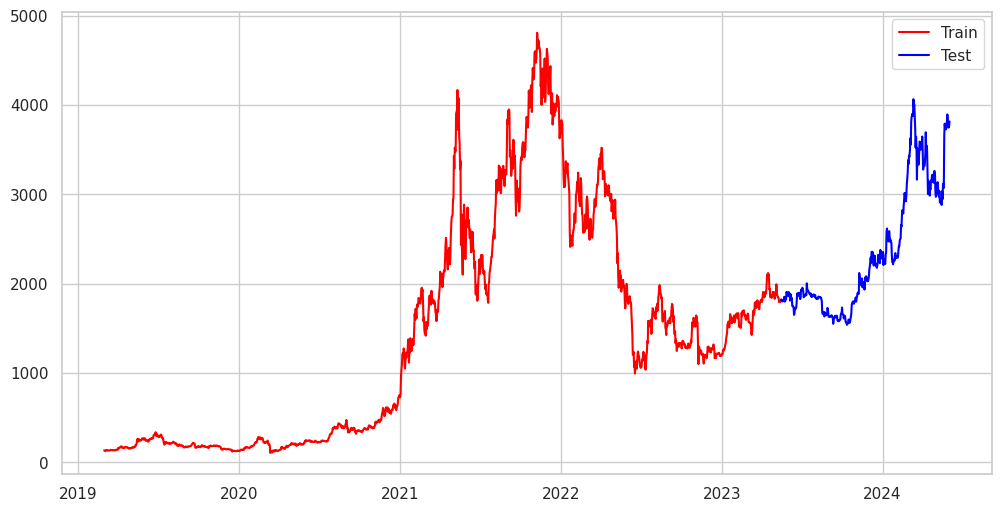

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(eth_df_train).index.to_list(), pd.DataFrame(eth_df_train['Price']), color='red', label='Train')
plt.plot(pd.DataFrame(eth_df_test).index.to_list(),pd.DataFrame(eth_df_test['Price']),color='blue' ,label ='Test')
plt.legend()
plt.show()

In [ ]:
eth_df['Price_diff'] = eth_df['Price'].diff(periods=7)
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1920 entries, 2019-03-01 to 2024-06-01
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        1920 non-null   float64
 1   Open         1920 non-null   float64
 2   High         1920 non-null   float64
 3   Low          1920 non-null   float64
 4   Vol.         1920 non-null   float64
 5   Change %     1920 non-null   float64
 6   Price_diff   1913 non-null   float64
 7   month_index  1920 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 127.5 KB


In [ ]:
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,135.72,135.47,138.06,128.46,9730000.0,0.0018,NaN,3
2019-03-02,132.76,135.72,136.36,130.74,11290000.0,-0.0218,NaN,3
2019-03-03,131.01,132.77,168.42,129.05,10640000.0,-0.0132,NaN,3
2019-03-04,125.97,131.02,131.57,123.25,14110000.0,-0.0385,NaN,3
2019-03-05,136.82,125.97,141.11,125.44,16740000.0,0.0861,NaN,3
...,...,...,...,...,...,...,...,...
2024-05-28,3845.56,3894.33,3929.21,3775.08,436240.0,-0.0125,55.10,5
2024-05-29,3769.57,3845.56,3886.44,3745.72,353250.0,-0.0198,30.49,5
2024-05-30,3747.55,3767.22,3824.94,3703.74,293810.0,-0.0058,-38.10,5


In [ ]:
eth_df['Price_diff'].fillna(method='backfill', inplace=True)

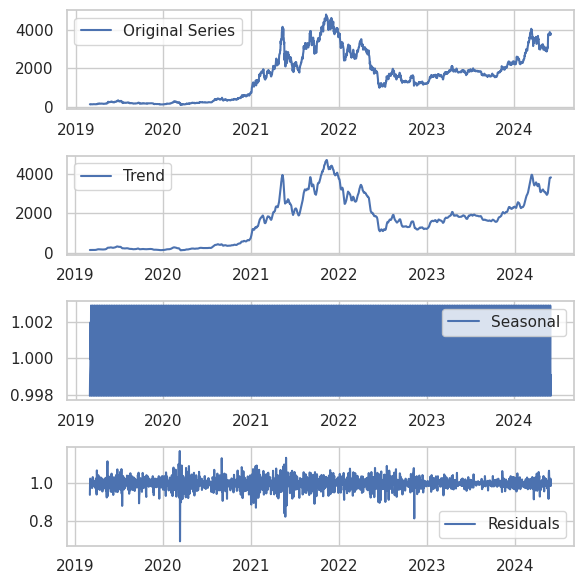

In [ ]:
result = seasonal_decompose(eth_df['Price'], model='multiplicative', period=7)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(6,6))

plt.subplot(4, 1, 1)
plt.plot(eth_df['Price'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()
# for fun i guess

In [ ]:
eth_df['month_index'] = eth_df.index.month
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,135.72,135.47,138.06,128.46,9730000.0,0.0018,-1.87,3
2019-03-02,132.76,135.72,136.36,130.74,11290000.0,-0.0218,-1.87,3
2019-03-03,131.01,132.77,168.42,129.05,10640000.0,-0.0132,-1.87,3
2019-03-04,125.97,131.02,131.57,123.25,14110000.0,-0.0385,-1.87,3
2019-03-05,136.82,125.97,141.11,125.44,16740000.0,0.0861,-1.87,3
...,...,...,...,...,...,...,...,...
2024-05-28,3845.56,3894.33,3929.21,3775.08,436240.0,-0.0125,55.10,5
2024-05-29,3769.57,3845.56,3886.44,3745.72,353250.0,-0.0198,30.49,5
2024-05-30,3747.55,3767.22,3824.94,3703.74,293810.0,-0.0058,-38.10,5


In [ ]:
df_monthly = eth_df.resample('M').mean()
df_monthly

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-31,136.375161,136.172581,140.065484,133.572258,1.167710e+07,0.001752,0.784516,3.0
2019-04-30,165.005667,164.344333,169.412667,159.621333,1.186200e+07,0.005223,4.618000,4.0
2019-05-31,219.652581,216.219677,227.308065,209.318387,1.344806e+07,0.017661,23.737419,5.0
2019-06-30,274.209333,273.389000,282.697333,264.795667,8.730000e+06,0.003943,11.260333,6.0
2019-07-31,247.334516,249.753226,256.461290,238.759032,9.371613e+06,-0.008245,-22.530323,7.0
...,...,...,...,...,...,...,...,...
2024-02-29,2746.431724,2710.027241,2782.710690,2672.922759,4.425869e+05,0.013400,214.253793,2.0
2024-03-31,3626.963871,3616.920968,3722.042258,3501.579032,5.989626e+05,0.003642,88.199032,3.0
2024-04-30,3246.043333,3267.134667,3340.207000,3150.657667,4.535570e+05,-0.005713,-90.864667,4.0


<Axes: xlabel='Date'>

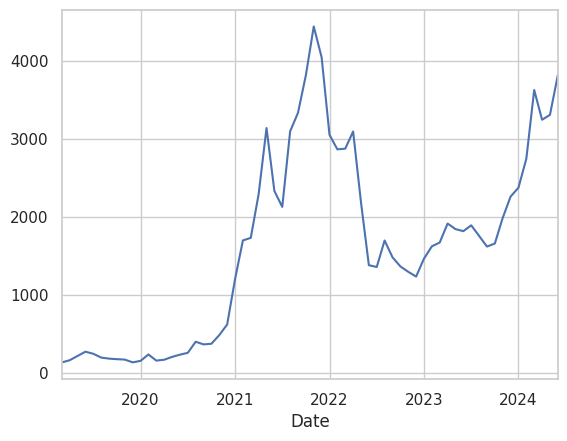

In [ ]:
df_monthly['Price'].plot()

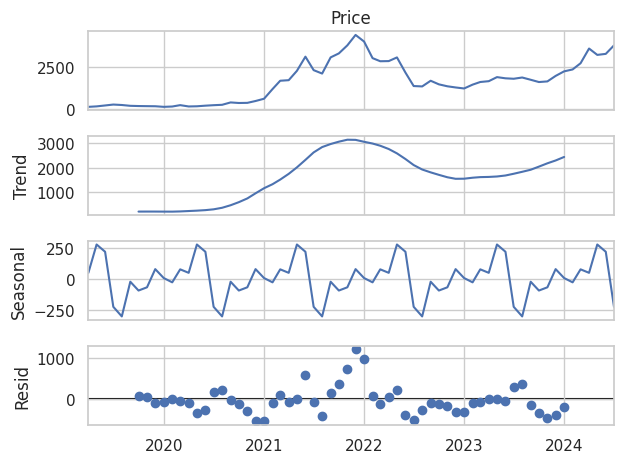

In [ ]:
decompose = seasonal_decompose(df_monthly['Price'])
decompose.plot()

plt.show()

In [ ]:
#import pmdarima as pm
#model = pm.auto_arima(df_monthly['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
					#	d=None, D=1,m=12,
				#		error_action='ignore',
					#	suppress_warnings=True,
				#		stepwise=True)

In [ ]:
import pmdarima as pm
model = pm.auto_arima(eth_df['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
						d=None, D=1,m=7,max_p=3, max_d=2, max_q=3,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,1,1)[7] intercept   : AIC=inf, Time=14.67 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=26055.170, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=23170.498, Time=4.23 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=24791.017, Time=2.54 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=26060.355, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=23667.577, Time=0.21 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=22923.368, Time=13.15 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=14.78 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=7.23 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=26051.399, Time=1.49 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=22919.944, Time=14.44 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=23165.836, Time=3.97 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=18.21 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=8.06 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=22

In [ ]:
train = eth_df_train['Price']
test = eth_df_test['Price']
start = len(train)
end = len(train) +len(test) -1
model_sarimax = sm.tsa.statespace.SARIMAX(eth_df['Price'],
                                          order = (4,0,1),
                                          seasonal_order = (2,1,0,7))
result = model_sarimax.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 1920
Model:             SARIMAX(4, 0, 1)x(2, 1, [], 7)   Log Likelihood              -11441.674
Date:                            Tue, 18 Jun 2024   AIC                          22899.349
Time:                                    09:53:28   BIC                          22943.800
Sample:                                03-01-2019   HQIC                         22915.707
                                     - 06-01-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5955      0.072     22.093      0.000       1.454       1.737
ar.L2         -0.5149      0.068     -7.520      0.000      -0.649      -0.381
ar.L3         -0.0802      0.026     -3.029      0.002      -0.132      -0.028
ar.L4         -0.0234      0.018     -1.321      0.186      -0.058       0.011
ma.L1         -0.7165      0.070    -10.182      0.000      -0.854      -0.579
ar.S.L7       -0.6807      0.011    -60.672      0.000      -0.703      -0.659
ar.S.L14      -0.3485      0.012    -28.198      0.000      -0.373      -0.324
sigma2      9150.3876    136.986     66.798      0.000    8881.900    9418.875
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7167.63
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              28.96   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions = result.predict(start, end)
predictions

2023-05-15    1775.227771
2023-05-16    1839.649791
2023-05-17    1842.495587
2023-05-18    1820.781527
2023-05-19    1844.234646
                 ...     
2024-05-28    3857.199632
2024-05-29    3824.719630
2024-05-30    3734.617236
2024-05-31    3684.418228
2024-06-01    3724.427052
Freq: D, Name: predicted_mean, Length: 384, dtype: float64

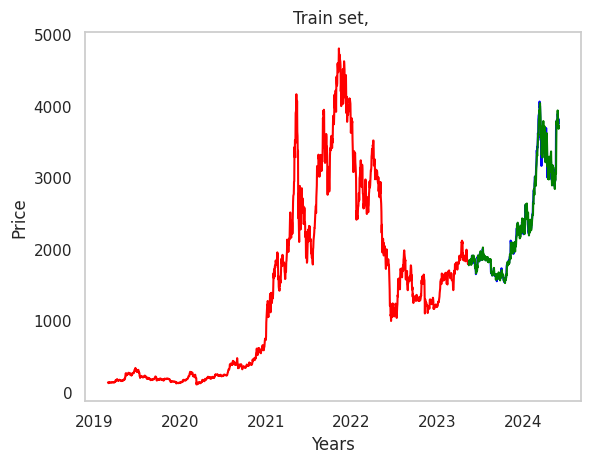

In [ ]:
plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error


print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MAPE =  0.021398548915219834
MAE =  53.78873572078828
RMSE =  82.30696476982652


In [ ]:
start = len(eth_df)

end = (len(eth_df) - 1) + 30

forecast_30 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 60


forecast_60 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 90


forecast_90 = result.predict(start, end)

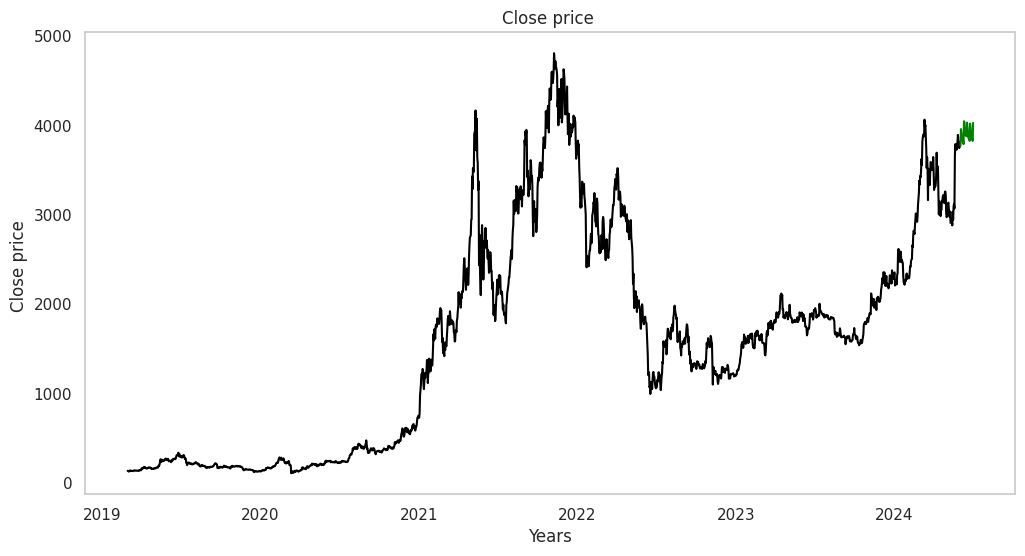

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Price'], color = 'black')
plt.plot(forecast_30, color = 'green')

# title and axis captions
plt.title("Close price ")
plt.ylabel("Close price ")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

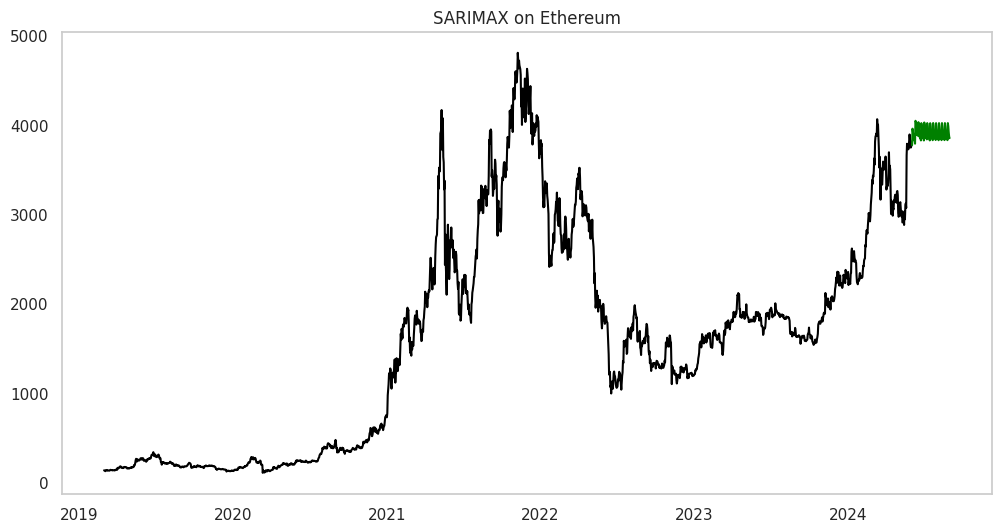

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Price'], color = 'black')
plt.plot(forecast_90, color = 'green')

# title and axis captions
#plt.title("Close price ")
#plt.ylabel("Close price ")
#plt.xlabel('Years')

# add a grid
plt.title("SARIMAX on Ethereum")
plt.grid()

plt.show()

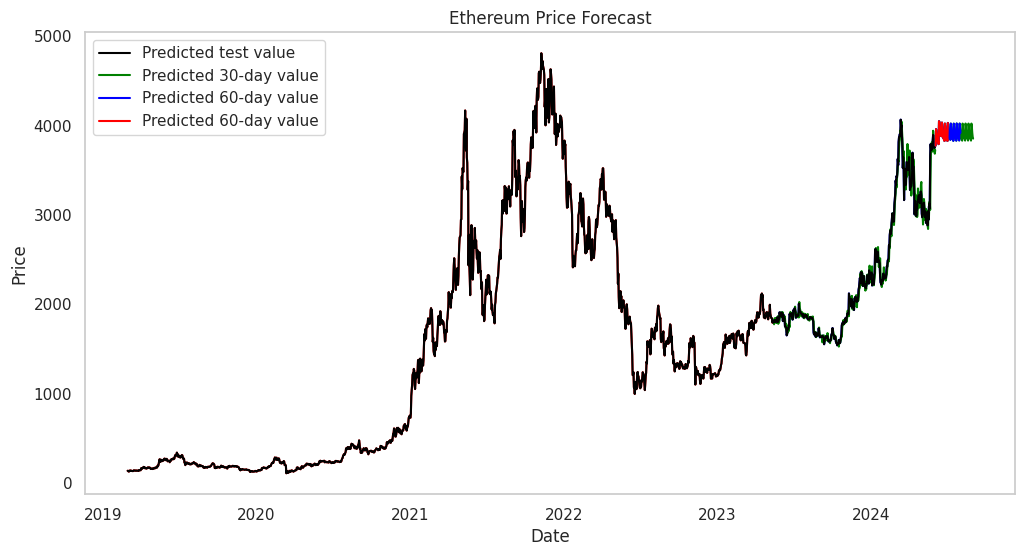

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')


plt.plot(eth_df['Price'], color = 'black', label='Predicted test value')
plt.plot(forecast_90, color = 'green', label='Predicted 30-day value')
plt.plot(forecast_60, color = 'blue', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'red', label='Predicted 60-day value')

# title and axis captions
plt.title("Ethereum Price Forecast")
plt.ylabel("Price")
plt.xlabel('Date')

# add a legend
plt.legend()

# add a grid
plt.grid()

# display the plot
plt.show()


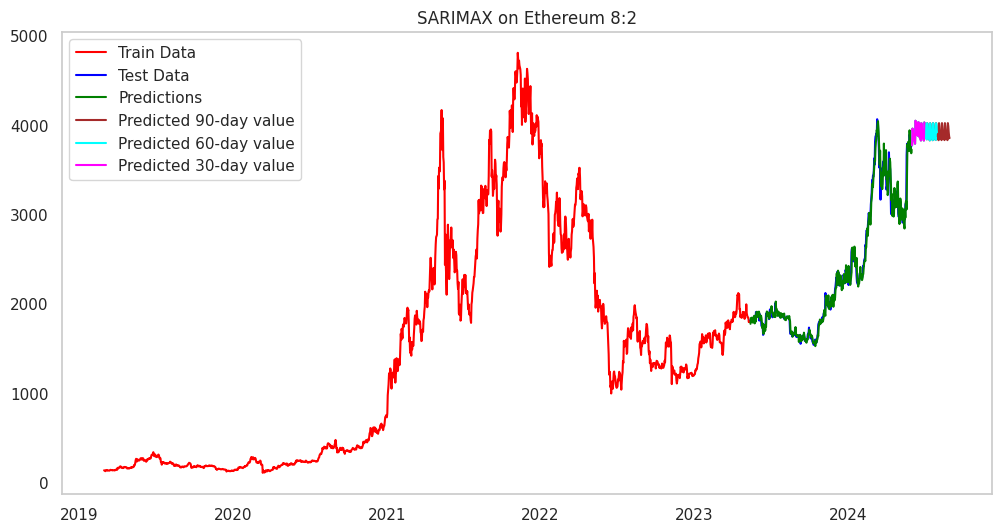

In [ ]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_90, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_60, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("SARIMAX on Ethereum 8:2")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()
